In [1]:
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

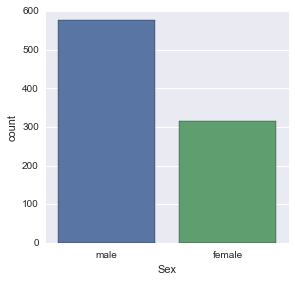

In [4]:
sns.factorplot('Sex',data=titanic_df,kind='count')

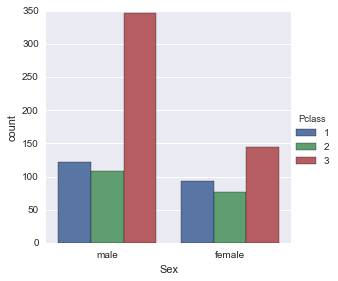

In [5]:
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind='count')

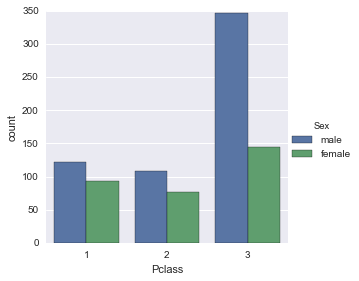

In [6]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [7]:
# separate into buckets
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [8]:
# creates new column with male, female and child
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [9]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


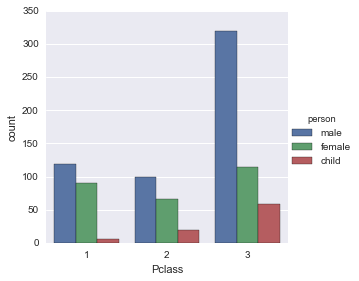

In [10]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

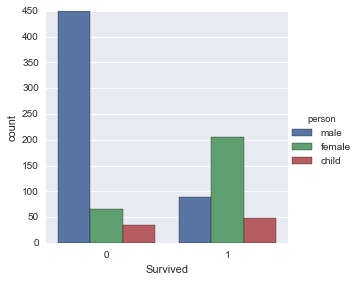

In [11]:
sns.factorplot('Survived',data=titanic_df,hue='person',kind='count')

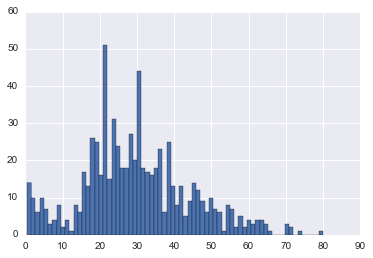

In [12]:
titanic_df['Age'].hist(bins=70)

In [13]:
titanic_df['Age'].mean()

29.69911764705882

In [14]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

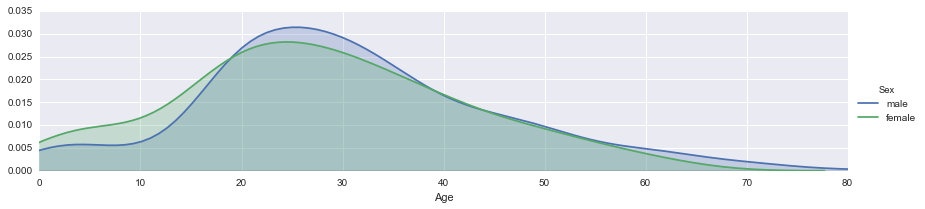

In [15]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

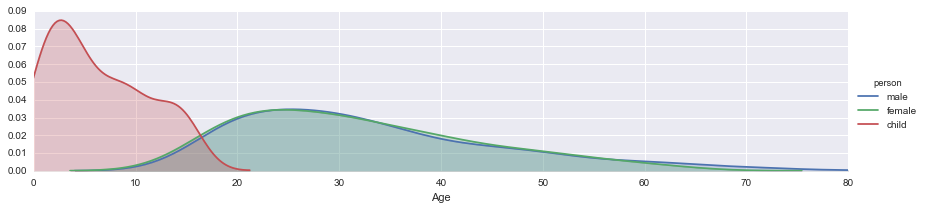

In [16]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

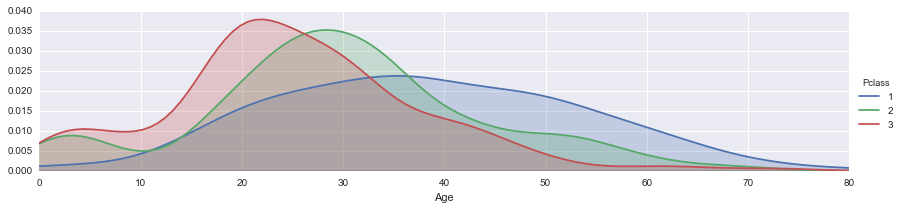

In [17]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

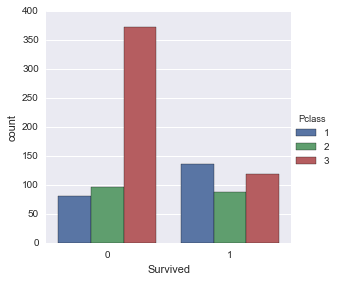

In [18]:
sns.factorplot('Survived',data=titanic_df,hue='Pclass',kind='count')

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [20]:
deck = titanic_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

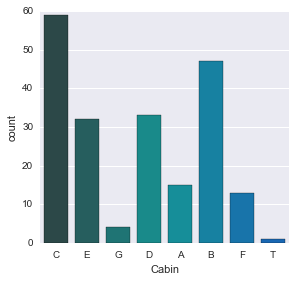

In [22]:
deck_letter = []

for level in deck:
    deck_letter.append(level[0])
    
cabin_df = DataFrame(deck_letter)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

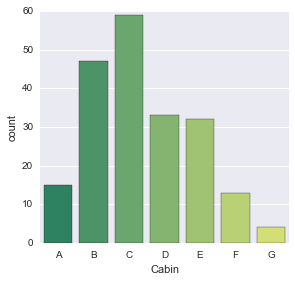

In [23]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df,order=np.unique(cabin_df),palette='summer',kind='count')

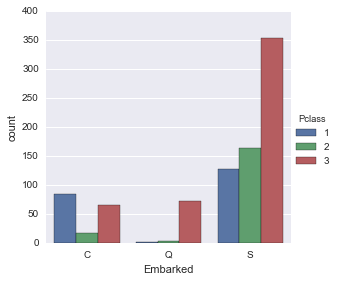

In [24]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])

In [25]:
#See who is alone and who isn't
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df['Alone'] = np.where(titanic_df['Alone'] == 0, 1, 0)

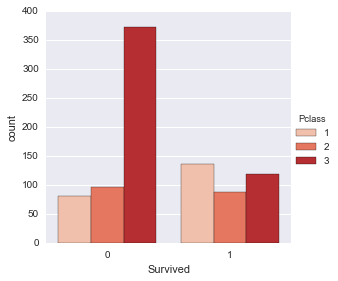

In [26]:
sns.factorplot('Survived',data=titanic_df,hue='Pclass',palette='Reds',kind='count')

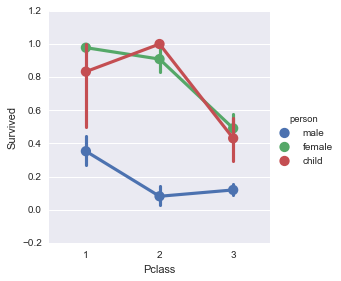

In [27]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

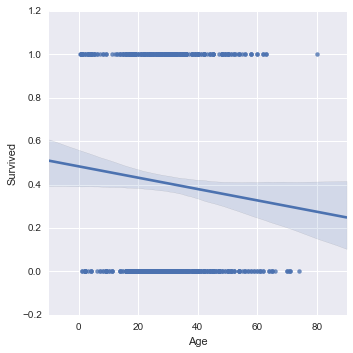

In [28]:
sns.lmplot('Age','Survived',data=titanic_df)

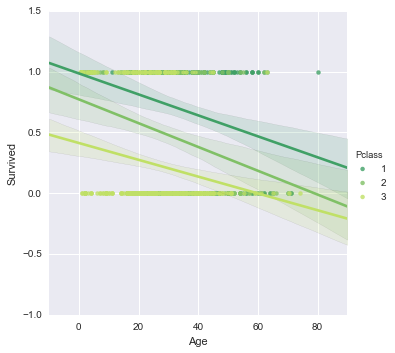

In [29]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='summer')

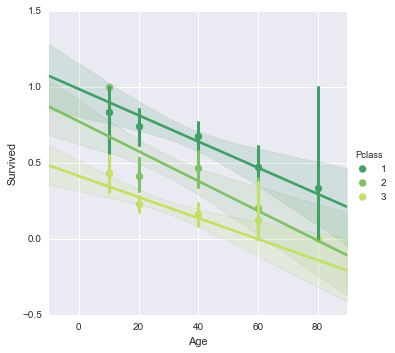

In [30]:
generations = [10,20,40,60,80]

# Visualization of passsenger age and class with chance of survival
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='summer',x_bins=generations)

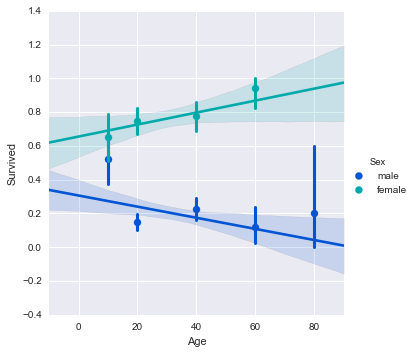

In [31]:
# Visualization of passsenger age and sex with chance of survival
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [32]:
# Following sections used for analysis on ways to clean data and fill missing values

In [33]:
titanic_df['Gender'] = titanic_df['Sex'].map({'female':0,'male':1}).astype(int)

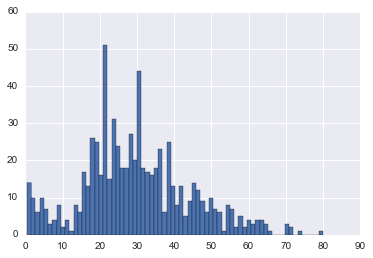

In [34]:
titanic_df['Age'].hist(bins=70)

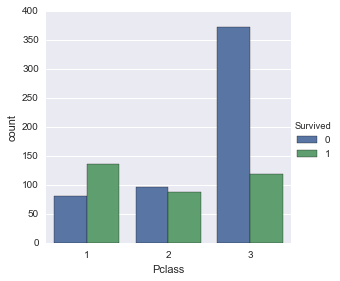

In [35]:
sns.factorplot('Pclass',hue='Survived',data=titanic_df,kind='count')

In [36]:
if len(titanic_df.Embarked[ titanic_df.Embarked.isnull()]) > 0:
    titanic_df.Embarked[titanic_df.Embarked.isnull()] = titanic_df.Embarked.dropna().mode().values
ports = list((enumerate(np.unique(titanic_df['Embarked']))))
ports_dict = {name : i for i, name in ports}
titanic_df.Embarked = titanic_df.Embarked.map(lambda x: ports_dict[x]).astype(int)

C:\Users\Dooj\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


C:\Users\Dooj\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


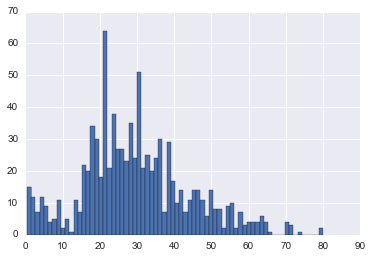

In [37]:
# fill in missing age values
num_samples = len(titanic_df.Age[titanic_df.Age.isnull()])
titanic_df.Age[titanic_df.Age.isnull()] = titanic_df.Age.dropna().sample(n=num_samples).values
titanic_df.Age.hist(bins=70)

In [38]:
titanic_train = titanic_df.drop(['Name','Sex','Ticket','PassengerId','Cabin'],axis=1)